In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the initial investment amount
initial_investment = 10000

# -------------------------------
# 1. Load and Prepare Realty Income Data (Ticker "O")
# -------------------------------
df_realty = pd.read_csv('Realty Income Stock Price History (1).csv')

# Convert 'Date' column to datetime and sort ascending
df_realty['Date'] = pd.to_datetime(df_realty['Date'])
df_realty.sort_values(by='Date', inplace=True)
df_realty.set_index('Date', inplace=True)

# -------------------------------
# 2. Adjust for the 2:1 Stock Split on January 03, 2005
# -------------------------------
# For all dates before the split, adjust the 'Close' price by dividing by 2.
split_date = pd.Timestamp('2005-01-03')
df_realty.loc[df_realty.index < split_date, 'Close'] = df_realty.loc[df_realty.index < split_date, 'Close'] / 2

# -------------------------------
# 3. Calculate Daily and Cumulative Returns
# -------------------------------
# Compute daily returns using the adjusted 'Close' prices
df_realty['Daily Return'] = df_realty['Change %'].str.replace('%', '').astype(float) / 100

# Calculate the cumulative return factor
df_realty['Cumulative Return'] = (1 + df_realty['Daily Return']).cumprod()

# Compute the portfolio value over time
df_realty['Portfolio Value'] = initial_investment * df_realty['Cumulative Return']

# -------------------------------
# 4. Calculate the Overall Percentage Return
# -------------------------------
final_portfolio_value = df_realty['Portfolio Value'].iloc[-1]
overall_percentage_return = ((final_portfolio_value - initial_investment) / initial_investment) * 100

print(f"Initial Investment: ${initial_investment:,.2f}")
print(f"Final Portfolio Value: ${final_portfolio_value:,.2f}")
print(f"Overall Percentage Return: {overall_percentage_return:.2f}%")

# -------------------------------
# 5. Plot the Portfolio Value Over Time
# -------------------------------
plt.figure(figsize=(10, 6))
plt.plot(df_realty.index, df_realty['Portfolio Value'], label='Realty Income Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.title('Backtest: $10,000 Investment in Realty Income (O)')
plt.legend()
plt.show()


KeyError: 'Close'

            Price   Open   High    Low     Vol. Change %  Daily Return  \
Date                                                                     
2024-11-01  57.89  59.41  60.05  55.88   99.19M   -2.49%       -0.0249   
2024-12-01  53.41  57.57  57.67  51.74  117.15M   -7.74%       -0.0774   
2025-01-01  54.64  53.26  56.15  51.60   97.72M    2.30%        0.0230   
2025-02-01  57.03  53.90  57.56  53.30   95.72M    4.37%        0.0437   
2025-03-01  57.13  56.67  60.38  55.80   68.37M    0.18%        0.0018   

            Cumulative Return  Portfolio Value  
Date                                            
2024-11-01           4.551801     45518.011483  
2024-12-01           4.199492     41994.917394  
2025-01-01           4.296080     42960.800494  
2025-02-01           4.483819     44838.187475  
2025-03-01           4.491890     44918.896213  


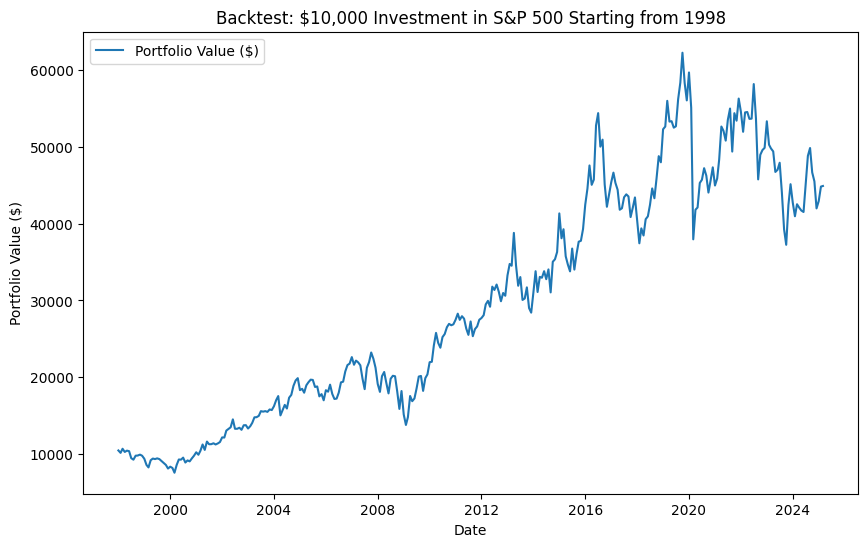